In [5]:
# Import
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
# Set project directory as working directory
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/home/ubuntu/master_thesis


In [7]:
# Import local libraries
from src.logger import set_logger as sl

In [8]:
# Set up logger and othe rimportant stuff
#logger = sl("loger.log")
file = 'data/raw/test/female/1000180_21015_0_0.png'

(1536, 2048, 3) <class 'numpy.ndarray'>


(-0.5, 2047.5, 1535.5, -0.5)

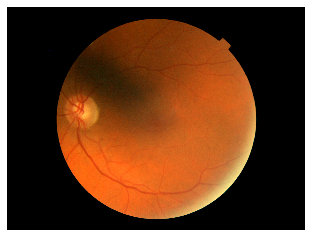

In [50]:
# Read in file
img = cv2.imread(file)
print(img.shape, type(img))
plt.matshow(img[:,:,::-1])
plt.axis("off")

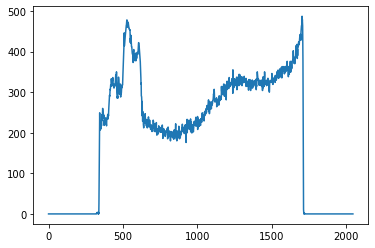

In [15]:
# Gets the row of pixels in the midle (vertically) of the Fundus
# Then sums their RGB values (R+G+B)
x = img[img.shape[0]//2, : , :].sum(1)
plt.plot(x)

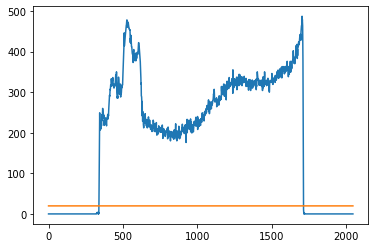

In [25]:
# Now, let's calculate a threshold (1/10 of the mean values)
t = np.ndarray(x.shape)
t.fill(x.mean()/10)
plt.plot(x) # R+G+B values
plt.plot(t) # Threshold

In [28]:
# Take as part of the fundus any pixel whose value is higher than the threshold 
r = (x > t).sum()/2
print(r)

688.0


(-0.5, 2047.5, 1535.5, -0.5)

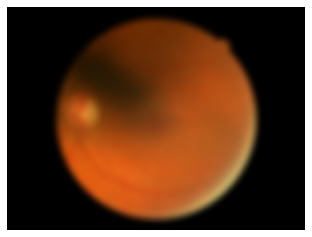

In [31]:
# Calculate the Gaussian Blur based on the radius of the Fundus
gaussian_blur = cv2.GaussianBlur(src=img, ksize=(0, 0), sigmaX=r/30)
plt.matshow(gaussian_blur[:,:,::-1])
plt.axis("off")

(-0.5, 2047.5, 1535.5, -0.5)

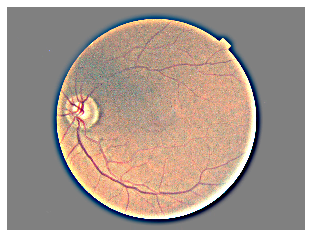

In [37]:
# Blend GB and Original Image
normalized_im = cv2.addWeighted(src1=img, alpha=4, src2=gaussian_blur, beta=-4, gamma=128)
plt.matshow(normalized_im[:,:,::-1])
plt.axis("off")

(-0.5, 2047.5, 1535.5, -0.5)

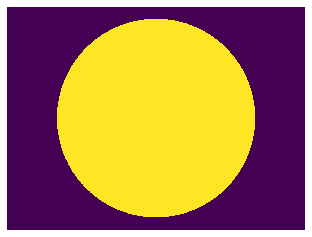

In [43]:
# to remove any frontier effects
# let's use the radius to calculate a mask 99%
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
cv2.circle(img=mask, center=(img.shape[1]//2, img.shape[0]//2), radius=int(r*0.99), color=(1,1,1,1), thickness=-1, lineType=8, shift=0)
plt.matshow(mask)
plt.axis("off")

(-0.5, 2047.5, 1535.5, -0.5)

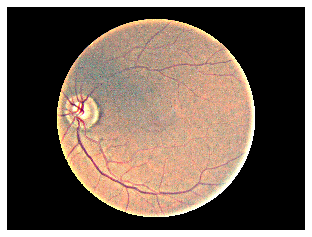

In [47]:
# Apply mask
normalized_im = cv2.bitwise_and(normalized_im, normalized_im, mask=mask)
plt.matshow(normalized_im[:,:,::-1])
plt.axis("off")

In [45]:
# Save
cv2.imwrite(f"output/normalized-test.png", normalized_im)

True